In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# loading dataset 

In [2]:
df = pd.read_csv('/kaggle/input/student-studeis-recommendation/student-scores.csv')

In [3]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


### drop columns -> id & first_name & last_name & email

In [5]:
df.drop(columns=['id','first_name','last_name','email'], axis=1, inplace=True)

In [6]:
df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


### Add total_score & average_score column to the data

In [4]:
df['total_score'] = df['math_score'] + df['history_score'] + df['physics_score'] +df['chemistry_score'] + df['biology_score'] + df['english_score'] + df['geography_score']
df['average_score'] = df['total_score'] / 7

In [5]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,521,74.428571


In [6]:
df.shape

(2000, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2000 non-null   int64  
 1   first_name                  2000 non-null   object 
 2   last_name                   2000 non-null   object 
 3   email                       2000 non-null   object 
 4   gender                      2000 non-null   object 
 5   part_time_job               2000 non-null   bool   
 6   absence_days                2000 non-null   int64  
 7   extracurricular_activities  2000 non-null   bool   
 8   weekly_self_study_hours     2000 non-null   int64  
 9   career_aspiration           2000 non-null   object 
 10  math_score                  2000 non-null   int64  
 11  history_score               2000 non-null   int64  
 12  physics_score               2000 non-null   int64  
 13  chemistry_score             2000 

In [11]:
df.describe()

,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000,566.862500,80.980357
std,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705,42.295568,6.042224
min,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000,414.000000,59.142857
25%,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000,541.000000,77.285714
50%,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000,567.000000,81.000000
75%,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000,593.000000,84.714286
max,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000,673.000000,96.142857


# Data Preprocessing

In [9]:
#check duplicates
df.duplicated().sum()

0

In [10]:
#check missing values
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
total_score                   0
average_score                 0
dtype: int64

In [12]:
#count the values of career_aspiration
df['career_aspiration'].value_counts()

career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64

# data visualization

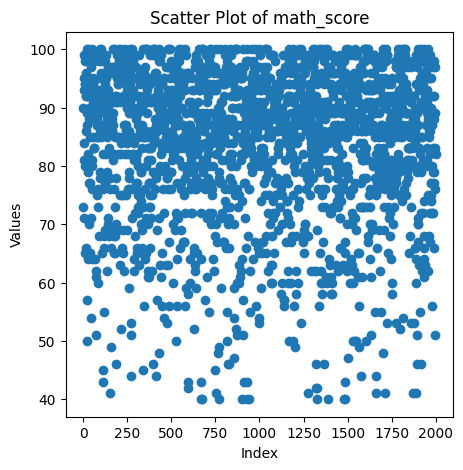

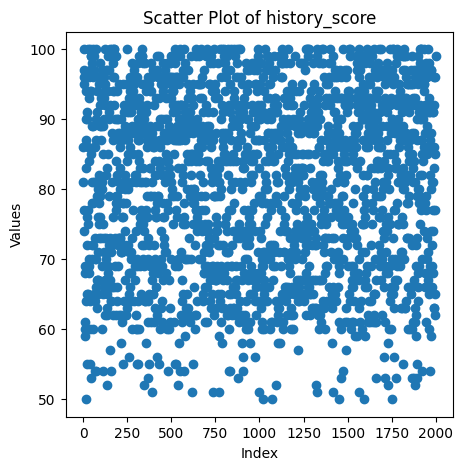

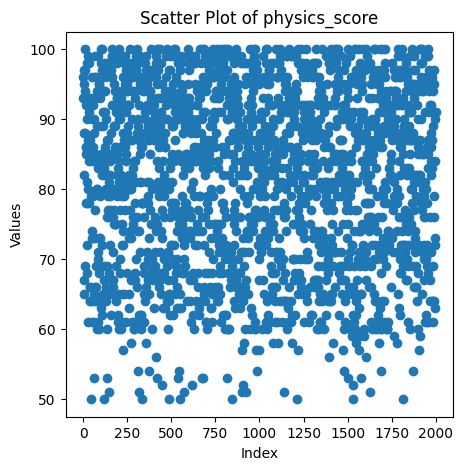

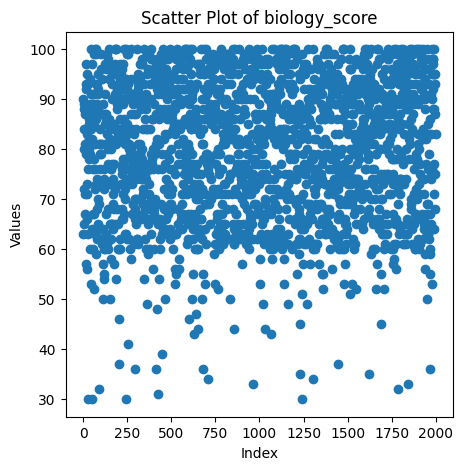

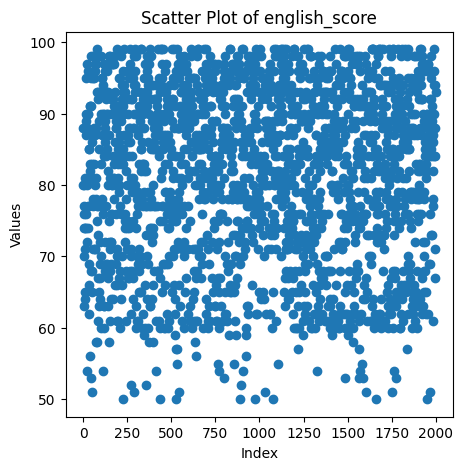

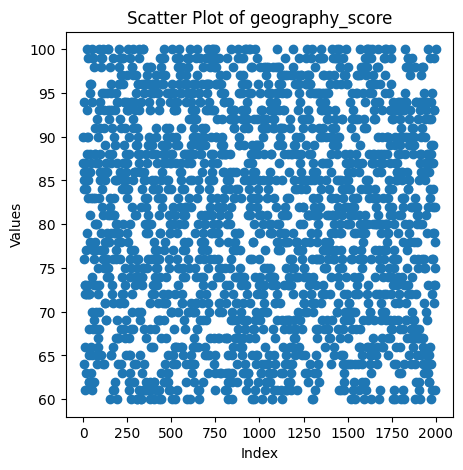

In [13]:
features=['math_score','history_score','physics_score','biology_score','english_score','geography_score']

# Create a scatter plot for each column
for feature in features:
    plt.figure(figsize=(5, 5))
    plt.scatter(range(len(df[feature])), df[feature])
    plt.title(f'Scatter Plot of {feature}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.show()

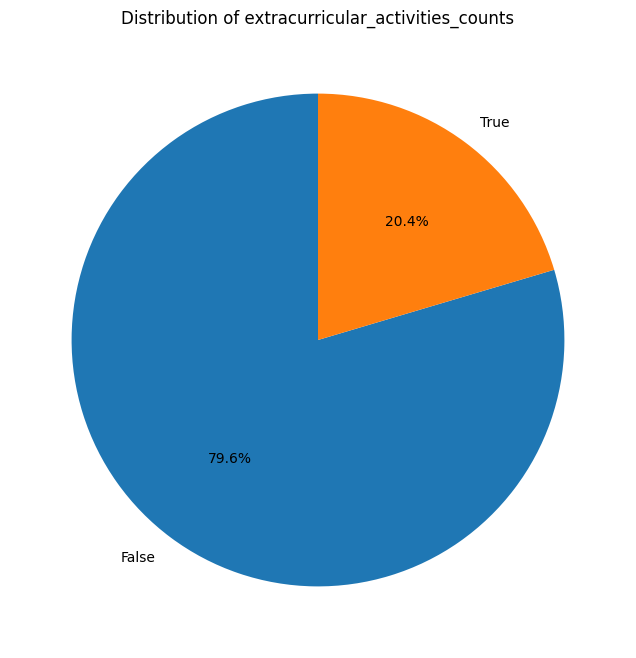

In [14]:

extracurricular_activities_counts = df['extracurricular_activities'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(extracurricular_activities_counts, labels=extracurricular_activities_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of extracurricular_activities_counts')
plt.show()

# visualization of Distribution of career aspiration

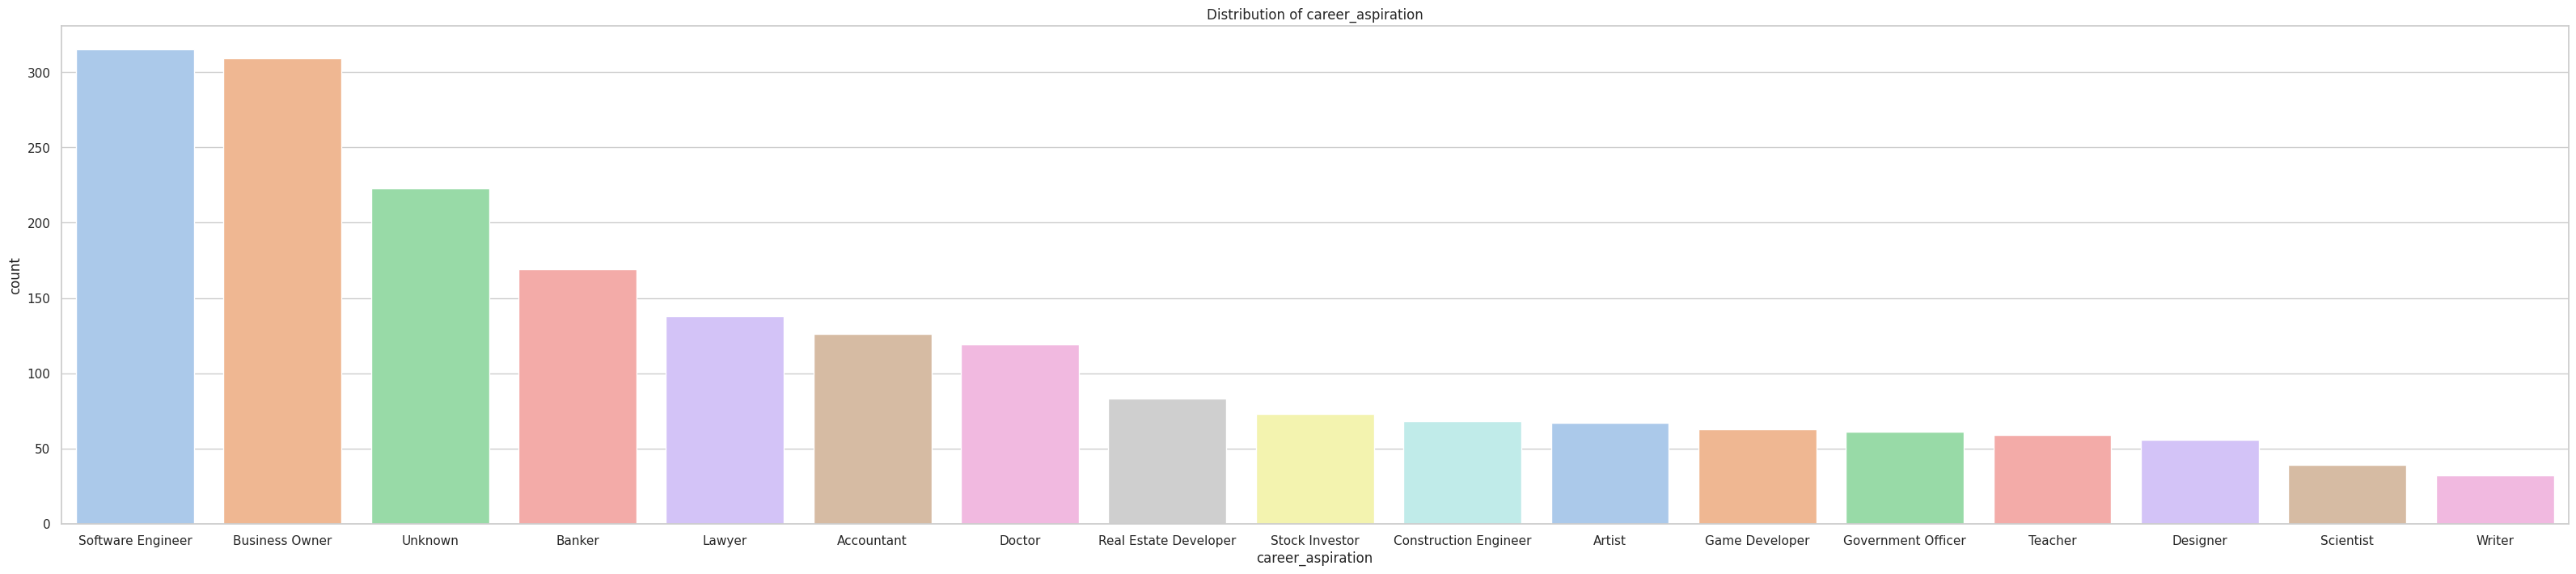

In [15]:
# visualization of Distribution of career_aspiration
sns.set(style="whitegrid")
plt.figure(figsize=(40, 8))

#we use countplot for Distribution of career_aspiration
sns.countplot(x='career_aspiration', data=df, palette="pastel", order=df['career_aspiration'].value_counts().index)

plt.title('Distribution of career_aspiration')
plt.show()

# Grouping 

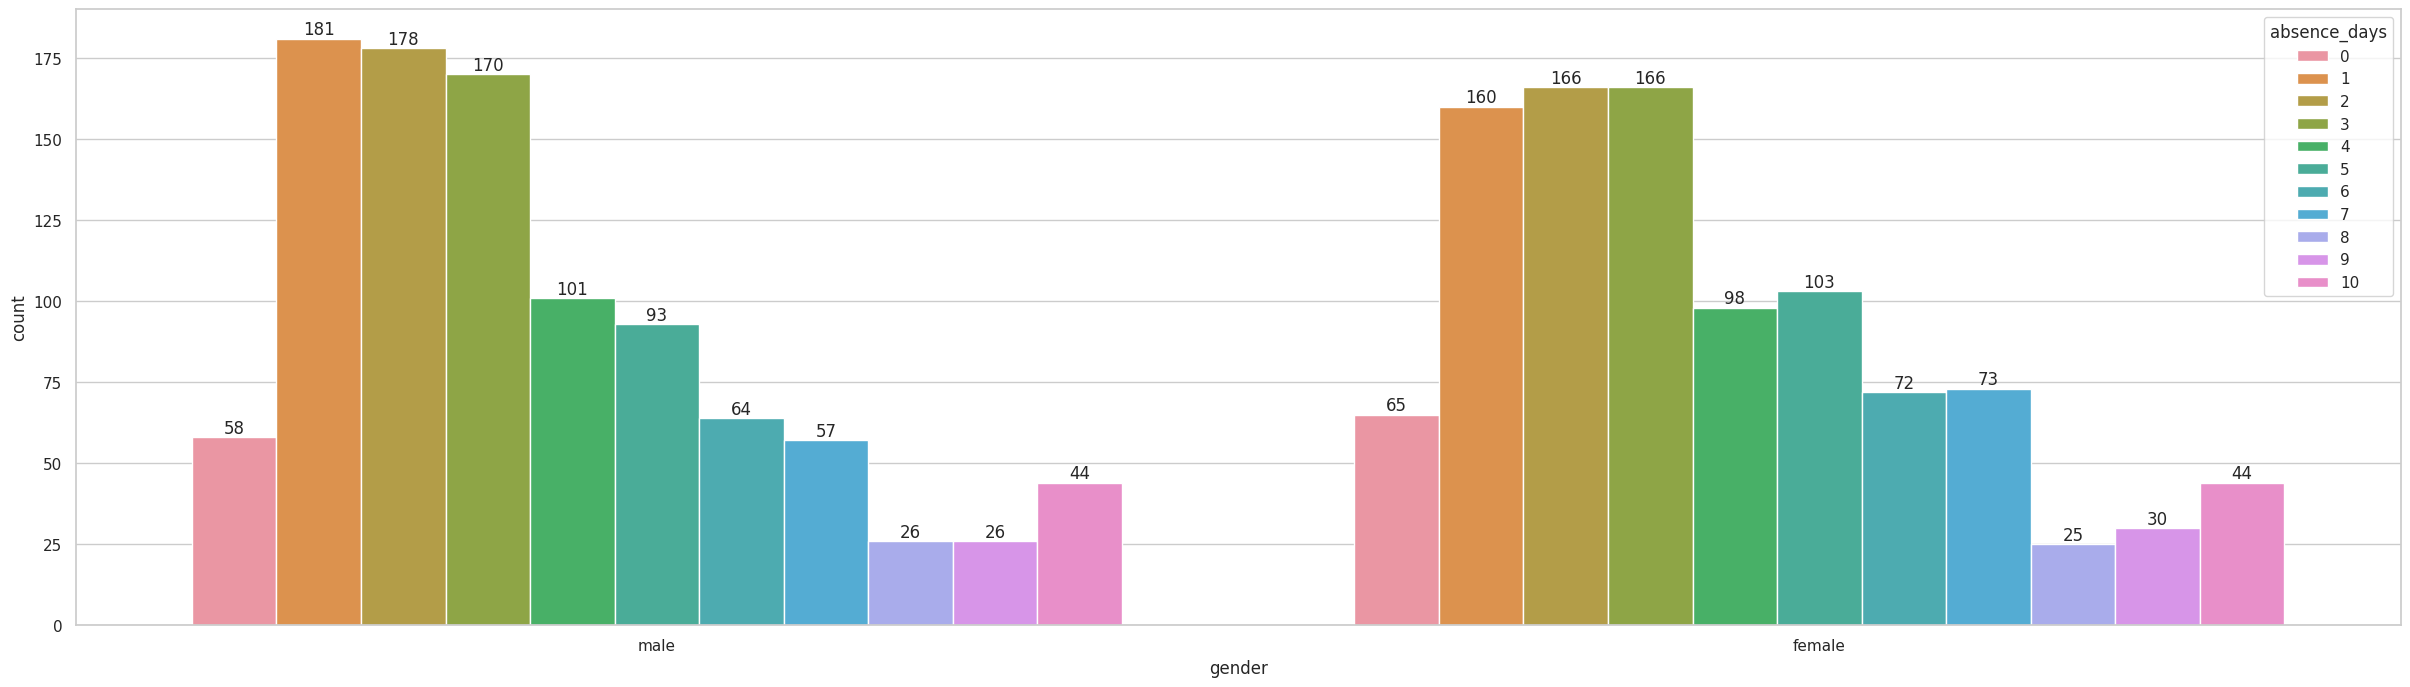

In [16]:
# gender groupby absence days visualization

plt.figure(figsize=(30, 8))
ax = sns.countplot(data = df, x = 'gender', hue = 'absence_days')
           
for bars in ax.containers:
    ax.bar_label(bars)

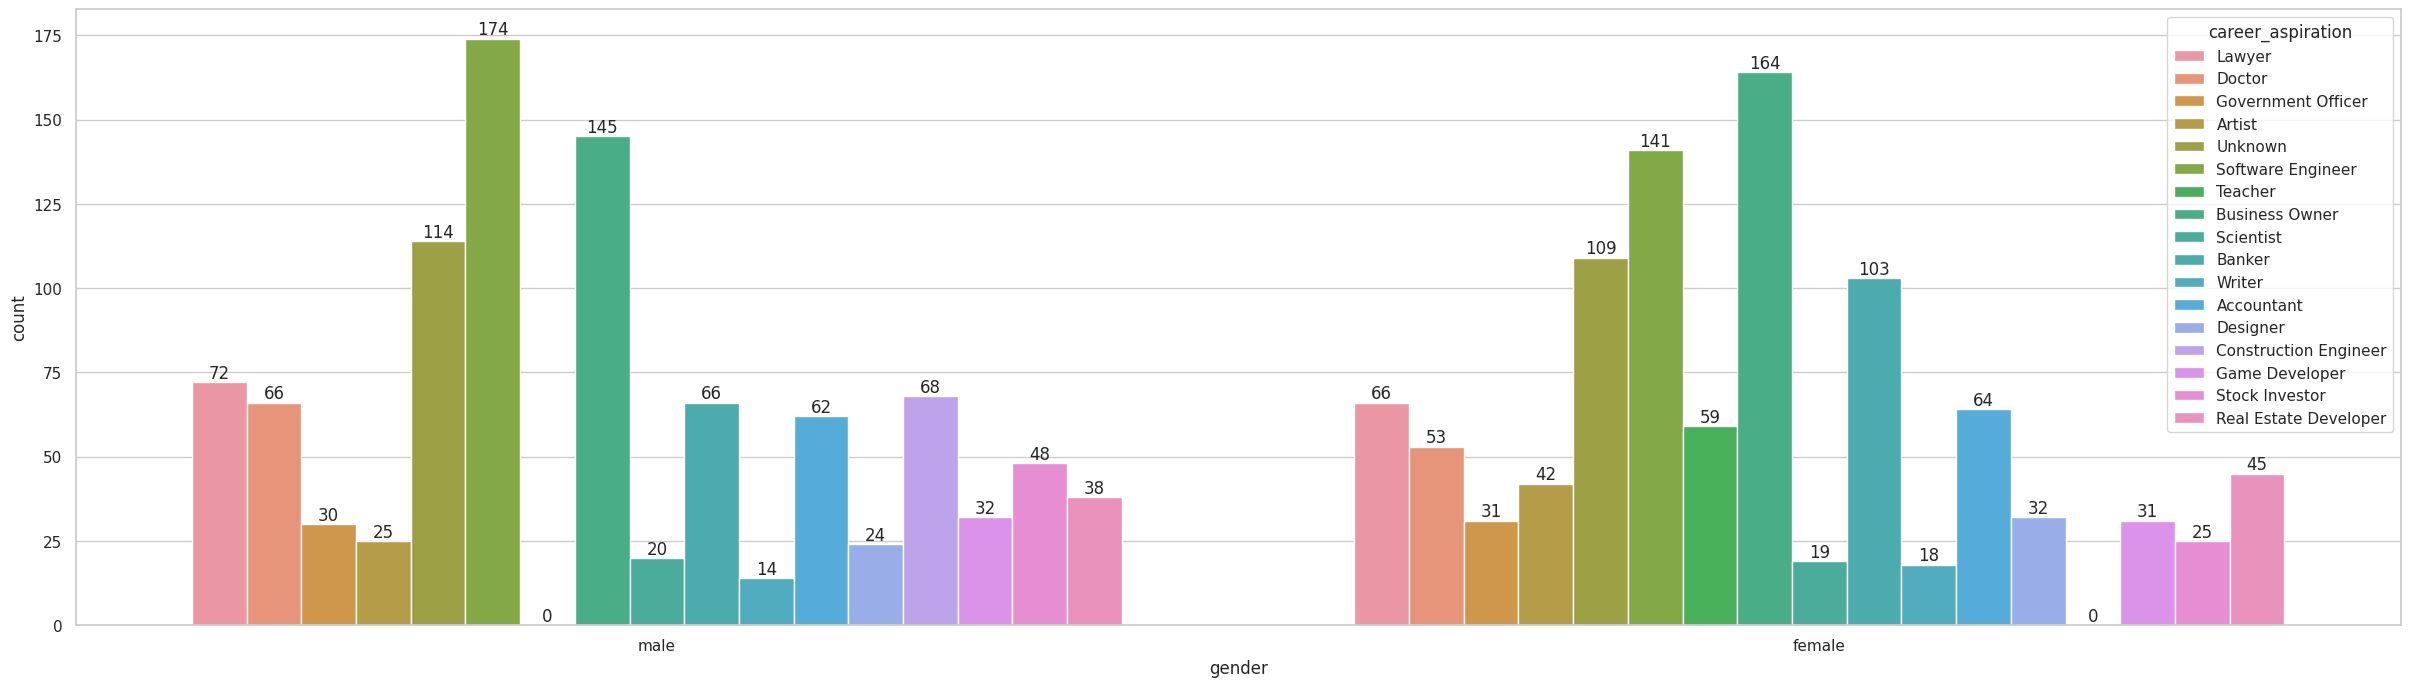

In [17]:
# gender groupby career_aspiration

plt.figure(figsize=(30, 8))
ax = sns.countplot(data = df, x = 'gender', hue = 'career_aspiration')
           
for bars in ax.containers:
    ax.bar_label(bars)

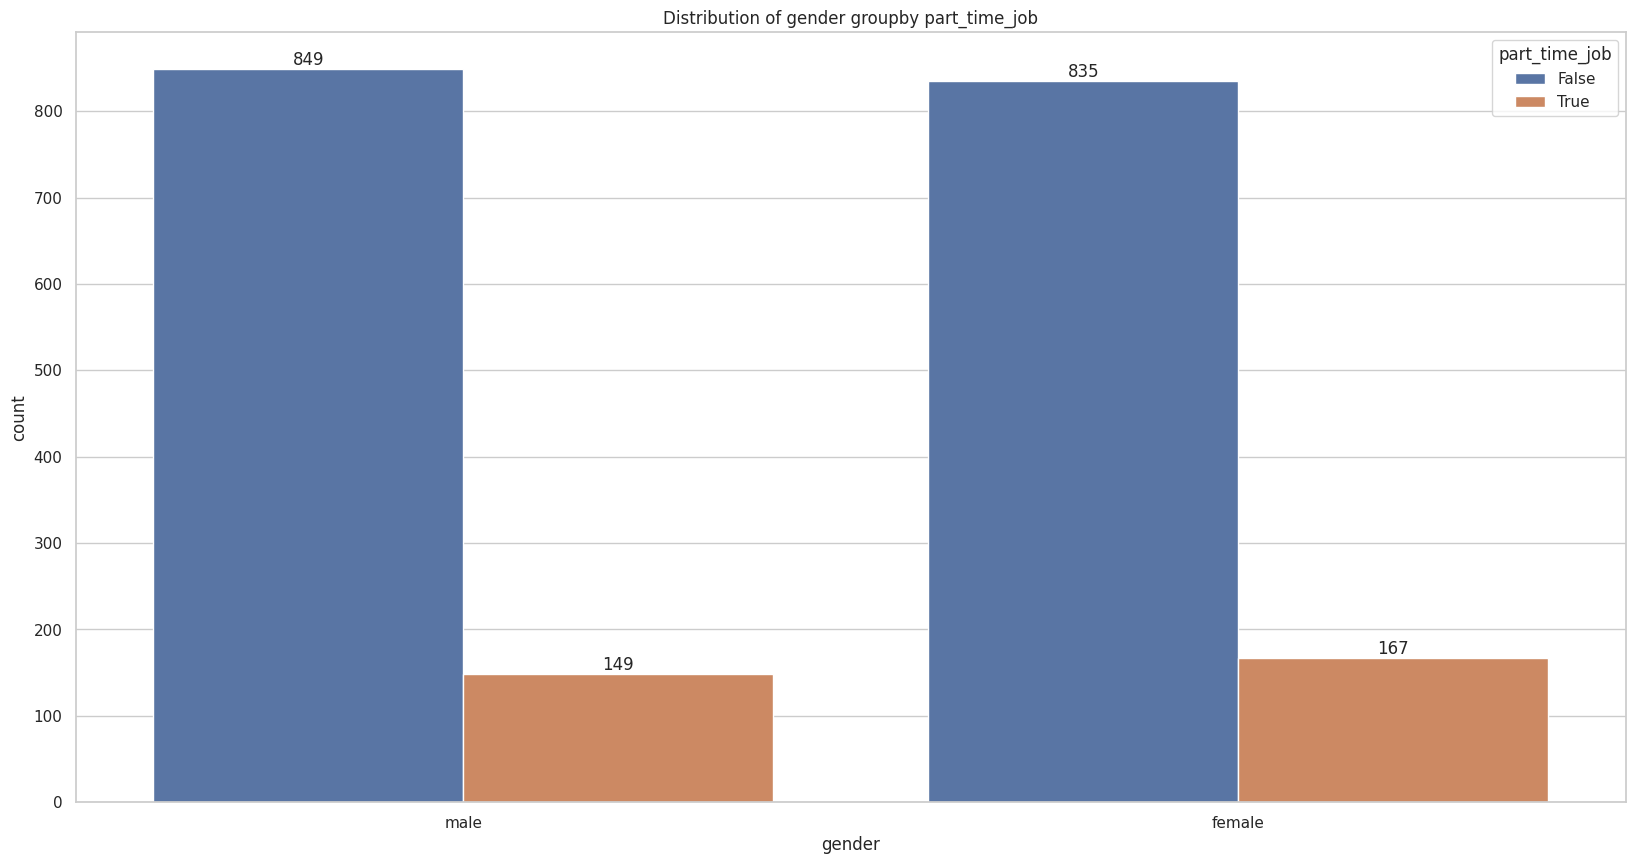

In [25]:
#Distribution of gender groupby part_time_job

plt.figure(figsize=(20, 10))

ax = sns.countplot(data = df, x = 'gender', hue = 'part_time_job')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of gender groupby part_time_job')
plt.show()

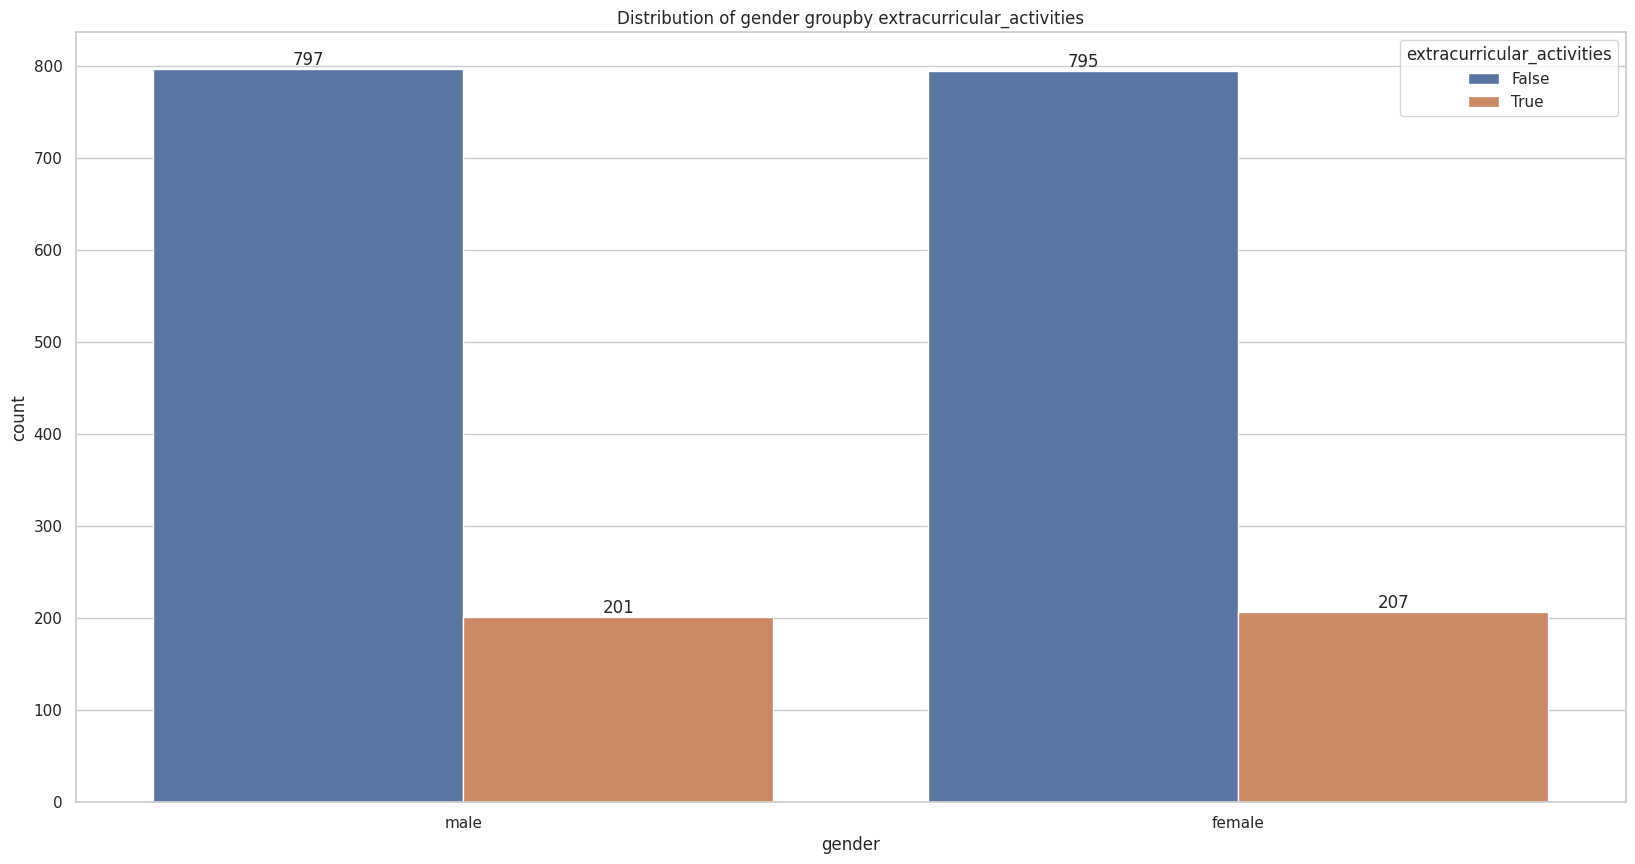

In [26]:
#Distribution of gender groupby extracurricular_activities

plt.figure(figsize=(20, 10))

ax = sns.countplot(data = df, x = 'gender', hue = 'extracurricular_activities')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of gender groupby extracurricular_activities')
plt.show()

# Enoding

In [19]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to each categorical column
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

df['career_aspiration_encoded'] = label_encoder.fit_transform(df['career_aspiration'])

df['part_time_job_encoded'] = label_encoder.fit_transform(df['part_time_job'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2000 non-null   int64  
 1   first_name                  2000 non-null   object 
 2   last_name                   2000 non-null   object 
 3   email                       2000 non-null   object 
 4   gender                      2000 non-null   object 
 5   part_time_job               2000 non-null   bool   
 6   absence_days                2000 non-null   int64  
 7   extracurricular_activities  2000 non-null   bool   
 8   weekly_self_study_hours     2000 non-null   int64  
 9   career_aspiration           2000 non-null   object 
 10  math_score                  2000 non-null   int64  
 11  history_score               2000 non-null   int64  
 12  physics_score               2000 non-null   int64  
 13  chemistry_score             2000 

# Student Studeis Recommendation

In [22]:
X = df[['part_time_job_encoded', 'absence_days', 'extracurricular_activities','weekly_self_study_hours', 'math_score','history_score', 'physics_score', 'chemistry_score', 'biology_score','english_score', 'geography_score','total_score','average_score']]
y = df['career_aspiration_encoded']

# SMOTE
SMOTE works by generating synthetic examples of the minority class. It does this by interpolating between existing minority class instances. Here's how it works:

Randomly select a minority class instance.
Find its k nearest neighbors (usually k=5).
Randomly select one of these neighbors.
Generate a synthetic instance at a random point between the selected instance and its neighbor.



In [24]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object

smote = SMOTE(random_state=42)

# Resample the dataset using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
df['career_aspiration'].value_counts()

career_aspiration
Software Engineer        315
Business Owner           309
Unknown                  223
Banker                   169
Lawyer                   138
Accountant               126
Doctor                   119
Real Estate Developer     83
Stock Investor            73
Construction Engineer     68
Artist                    67
Game Developer            63
Government Officer        61
Teacher                   59
Designer                  56
Scientist                 39
Writer                    32
Name: count, dtype: int64

In [26]:
y_resampled.value_counts()

career_aspiration_encoded
9     315
2     315
13    315
7     315
4     315
5     315
0     315
16    315
11    315
6     315
3     315
14    315
12    315
15    315
1     315
8     315
10    315
Name: count, dtype: int64

In [34]:
X_resampled.shape

(5355, 13)

In [35]:
y_resampled.shape

(5355,)

In [27]:
#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=0 )

In [28]:
x_train.shape

(4284, 13)

In [29]:
y_train.shape

(4284,)

In [39]:
x_test.shape

(1071, 13)

In [40]:
y_test.shape

(1071,)

# Feature Scaling

Equal Importance of Features: Scaling features ensures that all features contribute equally to the model's learning process. Without scaling, features with larger scales may dominate the learning process and overshadow the importance of other features.

In [32]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [33]:
X_train_scaled

array([[-0.25935415, -0.47110502, -0.63716017, ...,  1.21134116,
         2.21137227,  2.20889557],
       [-0.25935415, -0.93559613, -0.63716017, ...,  0.17787975,
        -0.68241762, -0.68228484],
       [-0.25935415,  0.45787721, -0.63716017, ..., -1.98299409,
        -0.68241762, -0.68986353],
       ...,
       [-0.25935415, -0.0066139 , -0.63716017, ...,  1.21134116,
         0.01519245,  0.00713774],
       [-0.25935415, -0.0066139 ,  1.56946407, ..., -1.2313858 ,
         0.91950178,  0.9304729 ],
       [-0.25935415, -0.47110502,  1.56946407, ...,  0.92948805,
        -0.08815719, -0.07343012]])

# building models

we are gonna test and find out the most accurate machine learning model for our dataset and use it for our predictions


In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    KNeighborsClassifier()
]


for classifier in classifiers:
    
    classifier.fit(X_train_scaled, y_train)
    
    
    y_pred = classifier.predict(X_test_scaled)
    
   
    accuracy = accuracy_score(y_test, y_pred)
    
   
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    
 
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
   
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: LogisticRegression
Accuracy: 0.4725
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.49      0.47        53
           1       0.49      0.71      0.58        62
           2       0.22      0.09      0.13        68
           3       0.87      0.86      0.86        70
           4       0.45      0.44      0.45        68
           5       0.27      0.24      0.26        58
           6       0.61      0.50      0.55        74
           7       0.70      0.84      0.76        69
           8       0.43      0.38      0.40        61
           9       0.41      0.47      0.44        64
          10       0.42      0.35      0.38        69
          11       0.46      0.68      0.55        57
          12       0.28      0.40      0.33        48
          13       0.31      0.12      0.18        64
          14       0.38      0.45      0.41        58
          15       0.37      0.21      0.27        67
          

# Random Forest (Model_selected)

In [43]:

rf_model = RandomForestClassifier()


rf_model.fit(x_train, y_train)


y_test_pred_rf = rf_model.predict(x_test)


print("Accuracy:", accuracy_score(y_test, y_test_pred_rf))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf))

Accuracy: 0.8450046685340803

Confusion Matrix:
[[44  0  0  0  3  0  0  0  0  0  0  1  3  0  1  1  0]
 [ 0 60  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0 35  0  4  1  0  0  2  2  0  2  4  3  4  2  9]
 [ 0  4  0 63  0  0  0  1  0  0  2  0  0  0  0  0  0]
 [ 0  0  1  0 67  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 52  0  0  0  0  2  0  0  0  1  2  0]
 [ 0  0  0  0  0  1 66  0  0  1  0  5  0  0  0  0  1]
 [ 0  0  0  2  0  0  0 67  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 60  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0 59  0  0  1  0  0  0  3]
 [ 0  6  0  1  0  0  0  2  1  0 58  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0 56  0  0  0  0  0]
 [ 5  0  5  0  5  0  1  0  0  2  0  1 22  5  1  1  0]
 [ 0  0  0  0  0  1  1  0  0  3  0  1  3 54  1  0  0]
 [ 0  0  0  0  1  0  0  0  1  0  0  0  1  0 55  0  0]
 [ 3  6  2  0  2  2  0  1  7  2  1  3  5  1  2 28  2]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0 59]]

Classification Report:
         

# testing the model

In [44]:

prediction1 = rf_model.predict(x_test.iloc[[1]])
print("Predicted Label :",prediction1)
print("Actual Label:", y_test.iloc[1])

Predicted Label : [14]
Actual Label: 14


In [45]:

prediction2 = rf_model.predict(x_test.iloc[[12]])
print("Predicted Label :",prediction2)
print("Actual Label:", y_test.iloc[12])

Predicted Label : [8]
Actual Label: 8


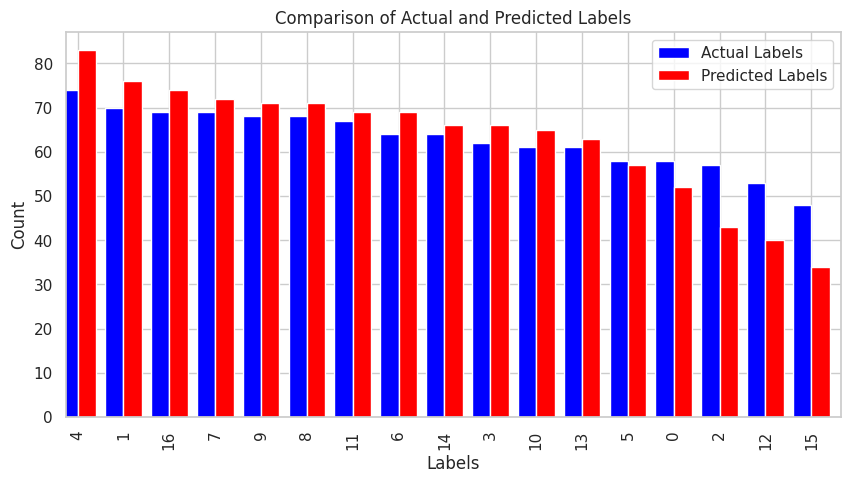

In [46]:

predicted_labels = rf_model.predict(x_test)

predicted_series = pd.Series(predicted_labels)

actual_counts = y_test.value_counts()

predicted_counts = predicted_series.value_counts()


plt.figure(figsize=(10, 5))


actual_counts.plot(kind='bar', color='blue', width=0.4, position=1, label='Actual Labels')

predicted_counts.plot(kind='bar', color='red', width=0.4, position=0, label='Predicted Labels')

plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Comparison of Actual and Predicted Labels')
plt.legend()
plt.show()


# Saving Model

In [47]:
import pickle


with open('RandomForestClassifierr_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("RandomForestClassifier model saved successfully.")

RandomForestClassifier model saved successfully.


# loading te model 

In [48]:
# Load the saved SVC model
with open('RandomForestClassifierr_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

print("RandomForestClassifier model loaded successfully.")

RandomForestClassifier model loaded successfully.


## Define the mapping of encoded labels to career aspirations

In [49]:
len(df['career_aspiration'].unique())

17

In [50]:
# Define the mapping of encoded labels to career aspirations
career_aspirations_mapping = dict(zip(df['career_aspiration_encoded'], df['career_aspiration']))

In [52]:
career_aspirations_mapping

{9: 'Lawyer',
 6: 'Doctor',
 8: 'Government Officer',
 1: 'Artist',
 15: 'Unknown',
 12: 'Software Engineer',
 14: 'Teacher',
 3: 'Business Owner',
 11: 'Scientist',
 2: 'Banker',
 16: 'Writer',
 0: 'Accountant',
 5: 'Designer',
 4: 'Construction Engineer',
 7: 'Game Developer',
 13: 'Stock Investor',
 10: 'Real Estate Developer'}

# Predicting System

In [ ]:

feature_names = ['part_time_job_encoded', 'absence_days',
                 'extracurricular_activities','weekly_self_study_hours',
                 'math_score','history_score', 'physics_score', 'chemistry_score',
                 'biology_score','english_score', 'geography_score'
                 ]


user_input = {}
for feature in feature_names:
    if feature == 'part_time_job_encoded':
        value = input(f"Enter value for {feature} ('True' or 'False'): ")
        value = 1 if value.lower() == 'true' else 0  # Convert boolean to numeric
    
    elif feature == 'extracurricular_activities':
        value = input(f"Does the student participate in extracurricular activities? (True/False): ")
        value = 1 if value.lower() == 'true' else 0  # Convert boolean to numeric
    
    elif feature in ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']:
        score = float(input(f"Enter value for {feature}: "))
        value = score
    
    else:
        value = float(input(f"Enter value for {feature}: "))
    user_input[feature] = value


user_df = pd.DataFrame(user_input, index=[0])


user_df = user_df[feature_names]


user_df['total_score'] = user_df[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']].sum(axis=1)


user_df['average_score'] = user_df['total_score'] / 7



predictions = rf_model.predict(user_df)


predicted_career_aspirations = [career_aspirations_mapping[prediction] for prediction in predictions]


total_score = user_df['total_score'].values[0]
average_score = user_df['average_score'].values[0]


print("")
print('total score:', total_score)
print('average score:', average_score)
print("")
print("prediction:", predictions)
print("Predicted Career Aspirations:", predicted_career_aspirations)

In [52]:
df.head(10)

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,...,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score,gender_encoded,career_aspiration_encoded,part_time_job_encoded
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,...,93,97,63,80,87,574,82.000000,1,9,0
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,...,96,100,90,88,90,640,91.428571,0,6,0
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,...,95,96,65,77,94,605,86.428571,0,8,0
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,...,88,80,89,63,86,551,78.714286,0,1,0
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,...,65,65,80,74,76,521,74.428571,1,15,0
5,6,Kelly,Wade,kelly.wade.6@gslingacademy.com,female,False,2,False,26,Unknown,...,67,78,72,80,84,574,82.000000,0,15,0
6,7,Anthony,Smith,anthony.smith.7@gslingacademy.com,male,False,3,True,23,Software Engineer,...,97,73,88,76,64,593,84.714286,1,12,0
7,8,George,Short,george.short.8@gslingacademy.com,male,True,2,True,34,Software Engineer,...,82,63,84,70,85,574,82.000000,1,12,1
8,9,Stanley,Gutierrez,stanley.gutierrez.9@gslingacademy.com,male,False,6,False,25,Unknown,...,94,85,81,74,72,568,81.142857,1,15,0
9,10,Audrey,Simpson,audrey.simpson.10@gslingacademy.com,female,False,3,True,18,Teacher,...,88,71,67,71,73,537,76.714286,0,14,0
